In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS, utils
from astropy.coordinates import SkyCoord
from matplotlib.colors import LogNorm
from astroquery.skyview import SkyView
SKYVIEW_LIST = list(np.concatenate(list(SkyView.survey_dict.values())).flat)

In [2]:
from spectral_cube import StokesSpectralCube
data_path = "/home/micah/Documents/data/mightee/MIGHTEE-pol_XMMLSS_mosaic.1-314chan.2023-01-26.fits"
cube = StokesSpectralCube.read(data_path, use_dask=True)
#cube = data.get_spectral_cube()wcs_=self.wcs[field],
print(cube)

In [3]:
cube.components

['I', 'Q', 'U', 'V']

In [4]:
cube._stokes_data["I"]

DaskSpectralCube with shape=(314, 6650, 8500) and unit=Jy / beam and chunk size (314, 326, 326):
 n_x:   8500  type_x: RA---SIN  unit_x: deg    range:    33.049579 deg:   37.809315 deg
 n_y:   6650  type_y: DEC--SIN  unit_y: deg    range:    -7.120808 deg:   -3.426304 deg
 n_s:    314  type_s: FREQ      unit_s: Hz     range: 887117076.285 Hz:1672542762.563 Hz

# Higher Dimension Test

In [5]:
import numpy as np

from cata2data import CataData
from cata2data.preprocessing import (
    image_preprocessing,
    wcs_preprocessing,
    catalogue_preprocessing,
)

catalogue_paths = ["/home/micah/Documents/data/mightee/XMMLSS_pol_detections.fits"]
image_paths = ["/home/micah/Documents/data/mightee/MIGHTEE-pol_XMMLSS_mosaic.1-314chan.2023-01-26.fits"]
field_names = ["XMMLSS"]

### Create Data Set ###
data = CataData(
    catalogue_paths=catalogue_paths,
    image_paths=image_paths,
    field_names=field_names,
    cutout_width=70,
    memmap=True,
    spectral_axis = True,
    stokes_axis = True
)

# print(data.df.columns)
print(len(data))
print(data[0].shape)

1663
(1, 4, 314, 70, 70)


# Read In Cosmos Image

In [6]:
from torch.utils.data import DataLoader
import numpy as np

from cata2data import CataData
from cata2data.preprocessing import (
    image_preprocessing,
    wcs_preprocessing,
    catalogue_preprocessing,
)

catalogue_paths = [
    "data/MIGHTEE_Continuum_Early_Science_COSMOS_Level1.fits",
    "data/MIGHTEE_Continuum_Early_Science_XMMLSS_Level1.fits",
]
image_paths = [
    "data/MIGHTEE_Continuum_Early_Science_COSMOS_r-1p2.app.restored.circ.fits",
    "data/MIGHTEE_Continuum_Early_Science_XMMLSS_r-1p2_circ.hires.fits",
]
field_names = ["COSMOS", "XMMLSS"]

### Create Data Set ###
mightee_data = CataData(
    catalogue_paths=catalogue_paths,
    image_paths=image_paths,
    field_names=field_names,
    cutout_width=70,
    catalogue_preprocessing=catalogue_preprocessing,
    spectral_axis=False
)
print(mightee_data.df.columns)
mightee_data.df.rename(mapper={"RA":"ra", "DEC":"dec"}, axis="columns", inplace=True)
print(mightee_data.df.columns)

print(len(mightee_data))
print(mightee_data[0].shape)
train_dataloader = DataLoader(mightee_data, batch_size=64, shuffle=True)

Index(['NAME', 'RA', 'E_RA', 'DEC', 'E_DEC', 'S_INT', 'E_S_INT', 'S_PEAK',
       'E_S_PEAK', 'NU_EFF', 'S_INT14', 'E_S_INT14', 'S_PEAK14', 'E_S_PEAK14',
       'IM_MAJ', 'E_IM_MAJ', 'IM_MIN', 'E_IM_MIN', 'IM_PA', 'E_IM_PA',
       'THETA_MAJ', 'E_THETA_MAJ', 'THETA_MIN', 'E_THETA_MIN', 'RESOLVED',
       'ISL_RMS', 'GAUS_ID', 'SRC_ID', 'ISL_ID', 'field'],
      dtype='object')
Index(['NAME', 'ra', 'E_RA', 'dec', 'E_DEC', 'S_INT', 'E_S_INT', 'S_PEAK',
       'E_S_PEAK', 'NU_EFF', 'S_INT14', 'E_S_INT14', 'S_PEAK14', 'E_S_PEAK14',
       'IM_MAJ', 'E_IM_MAJ', 'IM_MIN', 'E_IM_MIN', 'IM_PA', 'E_IM_PA',
       'THETA_MAJ', 'E_THETA_MAJ', 'THETA_MIN', 'E_THETA_MIN', 'RESOLVED',
       'ISL_RMS', 'GAUS_ID', 'SRC_ID', 'ISL_ID', 'field'],
      dtype='object')
1712
(1, 70, 70)


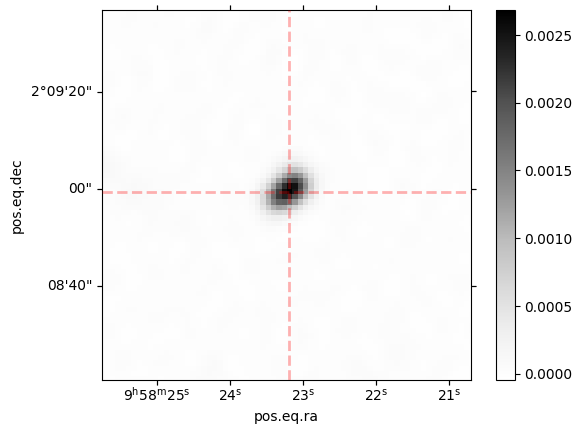

,NAME,ra,E_RA,dec,E_DEC,S_INT,E_S_INT,S_PEAK,E_S_PEAK,NU_EFF,...,THETA_MAJ,E_THETA_MAJ,THETA_MIN,E_THETA_MIN,RESOLVED,ISL_RMS,GAUS_ID,SRC_ID,ISL_ID,field
60,b'J095823.21+020859.3',149.596741,0.0,2.14982,0.0,0.004469,0.000016,0.003555,0.000008,1.341898e+09,...,0.00164,0.00001,0.00064,0.00002,1,0.000008,9372,7716,8730,COSMOS


In [7]:
idx = 60
mightee_data.plot(idx)
mightee_data.df.iloc[idx : idx + 1]

In [8]:
mightee_data.wcs

{'COSMOS': WCS Keywords
 
 Number of WCS axes: 2
 CTYPE : 'RA---SIN'  'DEC--SIN'  
 CRVAL : 150.11916666667  2.205833333333302  
 CRPIX : 2726.0  2726.0  
 PC1_1 PC1_2  : 1.0  0.0  
 PC2_1 PC2_2  : 0.0  1.0  
 CDELT : -0.00030555555555556  0.00030555555555556  
 NAXIS : 5450  5450  1  1,
 'XMMLSS': WCS Keywords
 
 Number of WCS axes: 2
 CTYPE : 'RA---TAN'  'DEC--TAN'  
 CRVAL : 35.15223662  -4.833701903  
 CRPIX : 4601.5  2352.0  
 NAXIS : 9203  4706}

/tmp/ipykernel_378388/1462669527.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection=wcs)


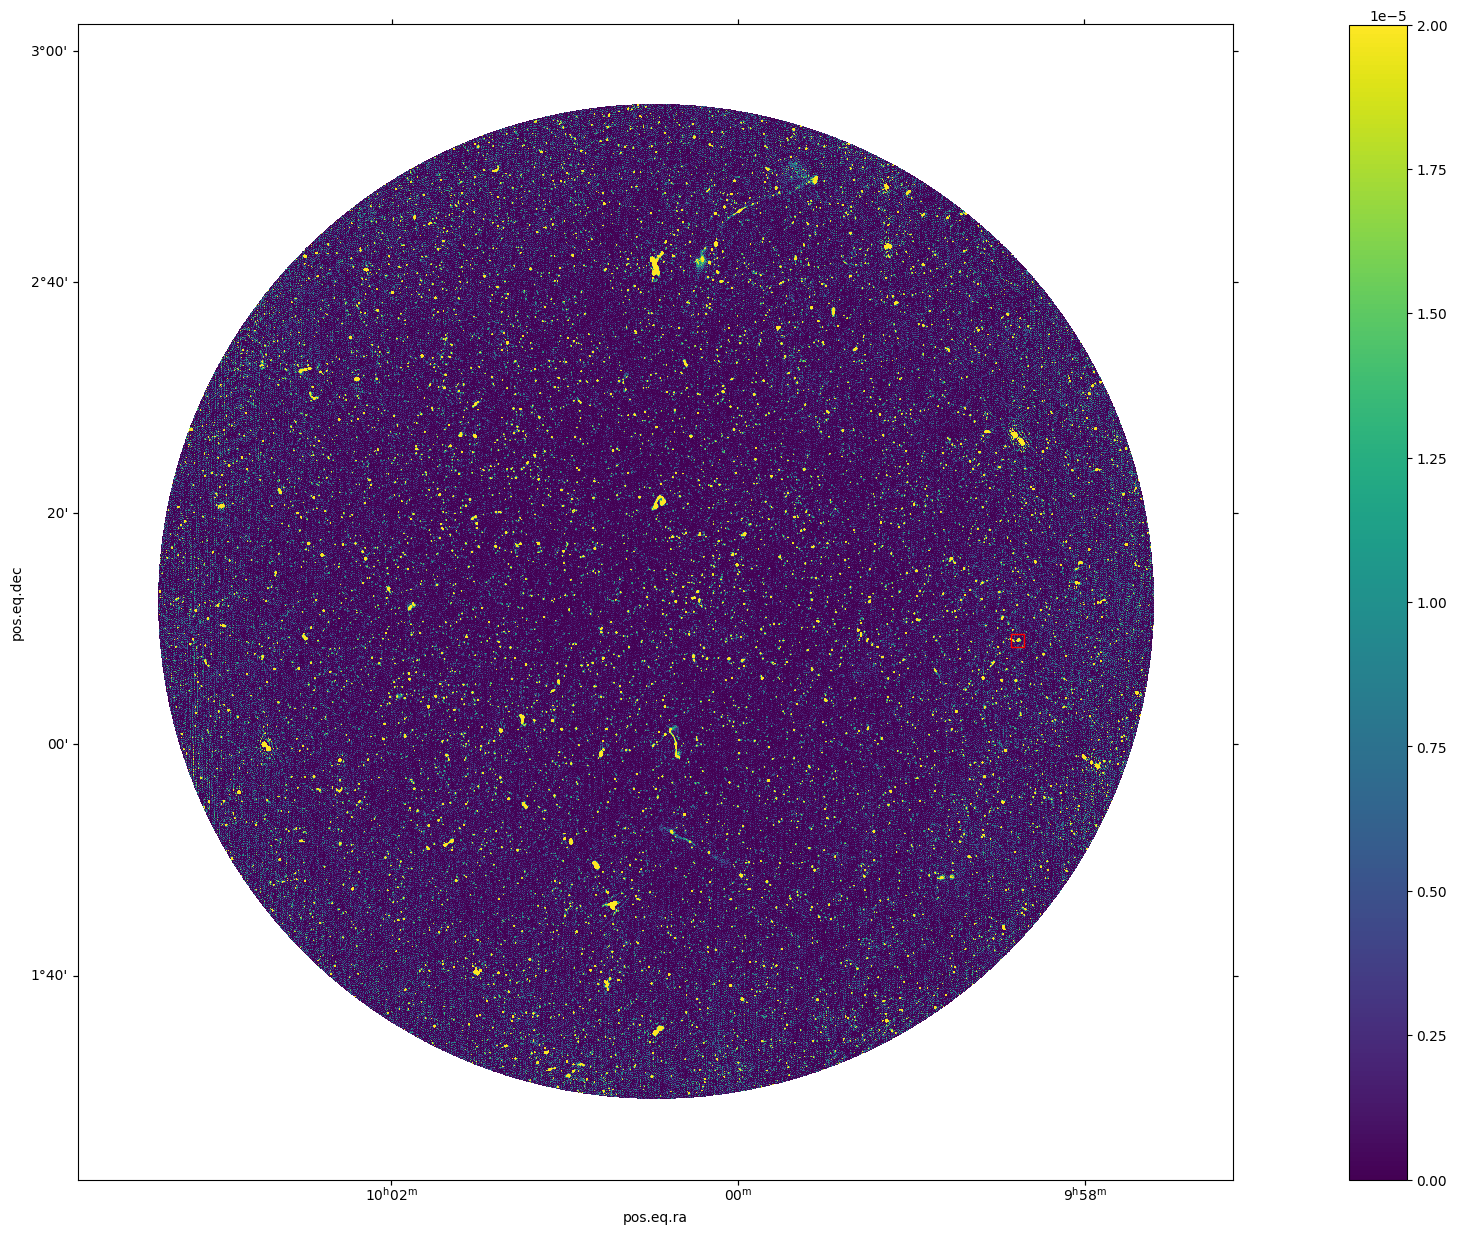

In [9]:
## Demonstration of box plotting
# Could loop over something like: mightee_data.df[mightee_data.df["field"]=="XMMLSS"].index
from astropy.nddata import Cutout2D

origin = 0
cutout_size = 64
entry = mightee_data.df.iloc[idx]
wcs = mightee_data.wcs[entry.field]

positions = wcs.all_world2pix(
    entry[["ra", "dec"]].values[np.newaxis, :].astype(np.float64), origin
)
image = mightee_data.images[entry.field]
cutout = Cutout2D(
    mightee_data.images[entry.field].squeeze(), positions[0], (cutout_size, cutout_size), wcs=wcs
)
fig = plt.subplots(figsize=(30, 15))
ax = plt.subplot(projection=wcs)
img = ax.imshow(np.squeeze(image), origin="lower", vmin=0.0, vmax=2.0e-5)
plt.colorbar(img)
cutout.plot_on_original(color="red")
plt.show()

# Read in Cosmos Catalogue

In [10]:
catalogue = "data/MIGHTEE_Continuum_Early_Science_COSMOS_Level1.fits"
with fits.open(catalogue, memmap=True) as hdul_cat:
    hdul_cat.info()
    df = pd.DataFrame(hdul_cat[1].data)
# df.head()
df

Filename: data/MIGHTEE_Continuum_Early_Science_COSMOS_Level1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1                1 BinTableHDU     95   9896R x 29C   [19A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, J, J, J]   


,NAME,RA,E_RA,DEC,E_DEC,S_INT,E_S_INT,S_PEAK,E_S_PEAK,NU_EFF,...,E_IM_PA,THETA_MAJ,E_THETA_MAJ,THETA_MIN,E_THETA_MIN,RESOLVED,ISL_RMS,GAUS_ID,SRC_ID,ISL_ID
0,J100320.73+020931.7,150.836411,0.00029,2.15882,0.00030,0.000104,0.000029,0.000056,0.000011,1.304066e+09,...,25.103121,0.00317,0.00109,0.00124,0.00098,0,0.000010,0,0,0
1,J100320.26+021312.7,150.834427,0.00003,2.22022,0.00008,0.000370,0.000024,0.000248,0.000010,1.304925e+09,...,4.725640,0.00274,0.00023,0.00000,0.00000,1,0.000010,1,1,1
2,J100319.37+021447.2,150.830734,0.00011,2.24645,0.00013,0.000075,0.000016,0.000079,0.000009,1.305699e+09,...,50.223122,0.00057,0.00135,0.00000,0.00000,0,0.000010,2,3,2
3,J100318.49+021000.5,150.827057,0.00016,2.16682,0.00021,0.000061,0.000018,0.000058,0.000010,1.306541e+09,...,31.520969,0.00138,0.00106,0.00000,0.00000,0,0.000010,3,4,3
4,J100317.73+021606.7,150.823883,0.00007,2.26855,0.00008,0.000164,0.000019,0.000142,0.000010,1.306922e+09,...,89.285698,0.00104,0.00045,0.00082,0.00053,0,0.000009,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9891,J095738.17+021200.3,149.409073,0.00020,2.20009,0.00022,0.000052,0.000017,0.000048,0.000009,1.306312e+09,...,119.687866,0.00095,0.00140,0.00025,0.00431,0,0.000009,9910,8187,9247
9892,J095738.01+020856.2,149.408386,0.00010,2.14895,0.00018,0.000064,0.000015,0.000068,0.000009,1.305622e+09,...,18.990450,0.00130,0.00090,0.00000,0.00000,0,0.000009,9911,8188,9248
9893,J095737.51+021703.5,149.406311,0.00008,2.28432,0.00012,0.000127,0.000019,0.000109,0.000010,1.304536e+09,...,13.036160,0.00185,0.00050,0.00000,0.00000,0,0.000009,9912,8189,9249
9894,J095736.94+020952.6,149.403946,0.00008,2.16462,0.00012,0.000076,0.000014,0.000089,0.000009,1.304847e+09,...,17.168850,0.00080,0.00091,0.00000,0.00000,0,0.000009,9913,8190,9250


In [11]:
# Needs to be used if bigendian error occurs in catalogue loading
from astropy.table import Table
table = Table.read(catalogue, memmap=True)
df = table.to_pandas()
df

,NAME,RA,E_RA,DEC,E_DEC,S_INT,E_S_INT,S_PEAK,E_S_PEAK,NU_EFF,...,E_IM_PA,THETA_MAJ,E_THETA_MAJ,THETA_MIN,E_THETA_MIN,RESOLVED,ISL_RMS,GAUS_ID,SRC_ID,ISL_ID
0,b'J100320.73+020931.7',150.836411,0.00029,2.15882,0.00030,0.000104,0.000029,0.000056,0.000011,1.304066e+09,...,25.103121,0.00317,0.00109,0.00124,0.00098,0,0.000010,0,0,0
1,b'J100320.26+021312.7',150.834427,0.00003,2.22022,0.00008,0.000370,0.000024,0.000248,0.000010,1.304925e+09,...,4.725640,0.00274,0.00023,0.00000,0.00000,1,0.000010,1,1,1
2,b'J100319.37+021447.2',150.830734,0.00011,2.24645,0.00013,0.000075,0.000016,0.000079,0.000009,1.305699e+09,...,50.223122,0.00057,0.00135,0.00000,0.00000,0,0.000010,2,3,2
3,b'J100318.49+021000.5',150.827057,0.00016,2.16682,0.00021,0.000061,0.000018,0.000058,0.000010,1.306541e+09,...,31.520969,0.00138,0.00106,0.00000,0.00000,0,0.000010,3,4,3
4,b'J100317.73+021606.7',150.823883,0.00007,2.26855,0.00008,0.000164,0.000019,0.000142,0.000010,1.306922e+09,...,89.285698,0.00104,0.00045,0.00082,0.00053,0,0.000009,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9891,b'J095738.17+021200.3',149.409073,0.00020,2.20009,0.00022,0.000052,0.000017,0.000048,0.000009,1.306312e+09,...,119.687866,0.00095,0.00140,0.00025,0.00431,0,0.000009,9910,8187,9247
9892,b'J095738.01+020856.2',149.408386,0.00010,2.14895,0.00018,0.000064,0.000015,0.000068,0.000009,1.305622e+09,...,18.990450,0.00130,0.00090,0.00000,0.00000,0,0.000009,9911,8188,9248
9893,b'J095737.51+021703.5',149.406311,0.00008,2.28432,0.00012,0.000127,0.000019,0.000109,0.000010,1.304536e+09,...,13.036160,0.00185,0.00050,0.00000,0.00000,0,0.000009,9912,8189,9249
9894,b'J095736.94+020952.6',149.403946,0.00008,2.16462,0.00012,0.000076,0.000014,0.000089,0.000009,1.304847e+09,...,17.168850,0.00080,0.00091,0.00000,0.00000,0,0.000009,9913,8190,9250


In [12]:
# Only consider resolved sources
df = df.loc[df["RESOLVED"] == 1]

# Sort by S_INT (integrated flux)
df = df.sort_values("S_PEAK", ascending=False, ignore_index=True).reset_index(drop=True)

# Only consider unique islands of sources
# df = df.groupby("ISL_ID", as_index=True).first()
df = df.drop_duplicates(subset=["ISL_ID"], keep="first")

# Only keep relevant columns
# df = df[["RA", "DEC", "S_INT", "S_PEAK", "IM_MAJ", "IM_MIN", "IM_PA", "THETA_MAJ", "ISL_RMS"]]

# Quick peak
df.head()

,NAME,RA,E_RA,DEC,E_DEC,S_INT,E_S_INT,S_PEAK,E_S_PEAK,NU_EFF,...,E_IM_PA,THETA_MAJ,E_THETA_MAJ,THETA_MIN,E_THETA_MIN,RESOLVED,ISL_RMS,GAUS_ID,SRC_ID,ISL_ID
0,b'J095821.54+022600.0',149.589783,0.0,2.43335,0.0,0.038022,0.000015,0.037699,0.000009,1.333992e+09,...,1.93664,0.00028,0.0,0.00014,0.00001,1,0.000009,9296,7674,8680
1,b'J095825.06+022650.0',149.604446,0.0,2.44723,0.0,0.027454,0.000016,0.026021,0.000009,1.335211e+09,...,0.36079,0.00075,0.0,0.00029,0.00001,1,0.000009,9303,7674,8681
2,b'J100217.96+015836.1',150.574860,0.0,1.97671,0.0,0.026073,0.000012,0.025939,0.000007,1.343968e+09,...,0.76808,0.00033,0.0,0.00000,0.00000,1,0.000007,798,698,742
3,b'J095908.30+024309.5',149.784622,0.0,2.71932,0.0,0.025080,0.000016,0.024726,0.000009,1.327427e+09,...,0.65349,0.00046,0.0,0.00000,0.00000,1,0.000009,8121,6682,7565
4,b'J100242.56+015938.5',150.677368,0.0,1.99404,0.0,0.022369,0.000014,0.024356,0.000009,1.330282e+09,...,0.12601,0.00044,0.0,0.00000,0.00000,1,0.000009,309,277,296


In [13]:
image_path = "data/MIGHTEE_Continuum_Early_Science_COSMOS_r-1p2.app.restored.circ.fits"
with fits.open(image_path, memmap=True) as hdul:
    hdul.info()
    image = hdul[0].data

Filename: data/MIGHTEE_Continuum_Early_Science_COSMOS_r-1p2.app.restored.circ.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   (5450, 5450, 1, 1)   float32   


/tmp/ipykernel_378388/1816158029.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection=wcs)


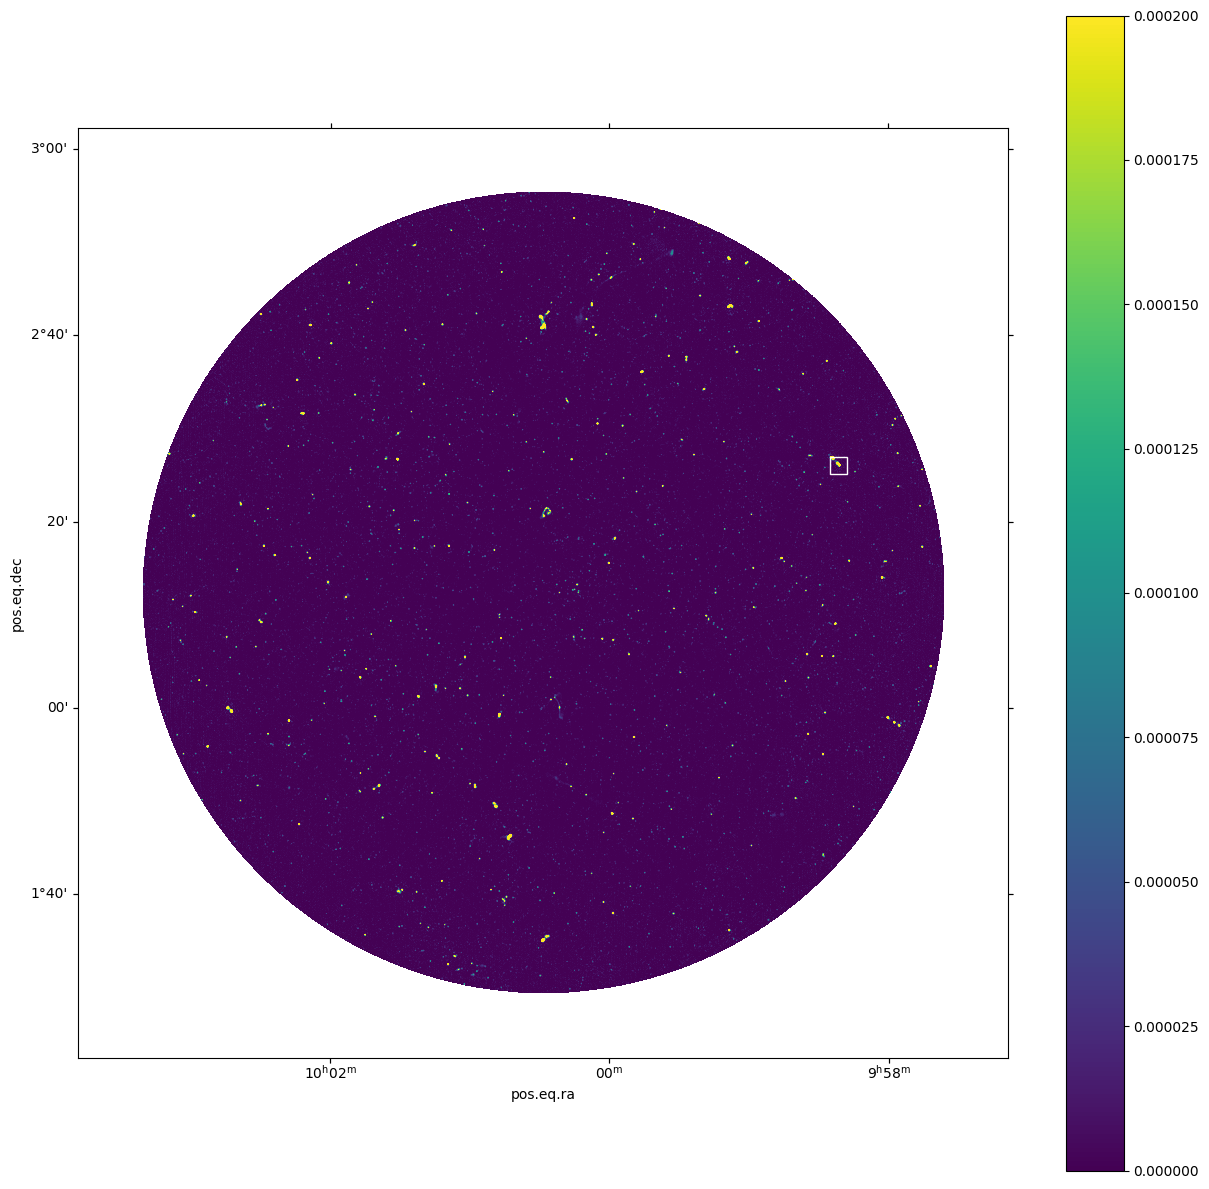

In [14]:
# Test astropy cutout
from astropy.nddata import Cutout2D

coords = df[["RA", "DEC"]].values
coords.shape
wcs = (
    WCS(hdul[0].header).dropaxis(3).dropaxis(2)
)  # Remove spurious axis (one of which is freq but mfs, one is polarisation stokes I).
origin = 0
positions = wcs.all_world2pix(coords, origin)
cutout = Cutout2D(np.squeeze(image), positions[0], (100, 100), wcs=wcs)
fig = plt.subplots(figsize=(15, 15))
ax = plt.subplot(projection=wcs)
img = ax.imshow(np.squeeze(image), origin="lower", vmin=0.0, vmax=2.0e-4)
plt.colorbar(img)
cutout.plot_on_original(color="white")
plt.show()